# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

In [4]:
data.shape

(5391, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [6]:
data.head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [7]:
data.isnull().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [8]:
data.duplicated().values.any()
# duplicated_rows = data[data.duplicated()]
# len(duplicated_rows)

False

In [9]:
type(data['USD_Production_Budget'])

pandas.core.series.Series

### Data Type Conversions

In [10]:
char_to_remove=['$',',']
columns_to_clean=['USD_Production_Budget', 'USD_Worldwide_Gross','USD_Domestic_Gross']
for i in columns_to_clean:
    for j in char_to_remove:
        data[i]=data[i].astype(str).str.replace(j,"",regex=True)
    data[i] = pd.to_numeric(data[i])

Convert the `Release_Date` column to a Pandas Datetime type. 

In [11]:
data['Release_Date']=pd.to_datetime(data['Release_Date'])
data['Release_Date'].head(5)

0   1915-08-02
1   1916-05-09
2   1916-12-24
3   1920-09-17
4   1925-01-01
Name: Release_Date, dtype: datetime64[ns]

In [12]:
data.tail(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


### Descriptive Statistics

In [13]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [14]:
data.USD_Production_Budget.min()

1100

In [15]:
print(data[data.USD_Production_Budget==1100])

      Rank Release_Date        Movie_Title  USD_Production_Budget  \
2427  5391   2005-05-08  My Date With Drew                   1100   

      USD_Worldwide_Gross  USD_Domestic_Gross  
2427               181041              181041  


# Investigating the Zero Revenue Films

In [16]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [17]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [18]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &  (data.USD_Worldwide_Gross != 0)]
print(len(international_releases))
print(international_releases.head())

155
      Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
1579                 7890                   0  
1744             10834406                   0  
2155                63180                   0  
2203              5918742                   0  


Using the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

In [19]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films


In [20]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
not_released=data[data.Release_Date>=scrape_date]
print(f"Unreleased films : {len(not_released)}")
not_released

Unreleased films : 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [21]:
data_clean = data.drop(not_released.index)

### Films that Lost Money


In [22]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
print((len(money_losing)/len(data_clean))*100)

37.27711738484398


# Seaborn for Data Viz: Bubble Charts

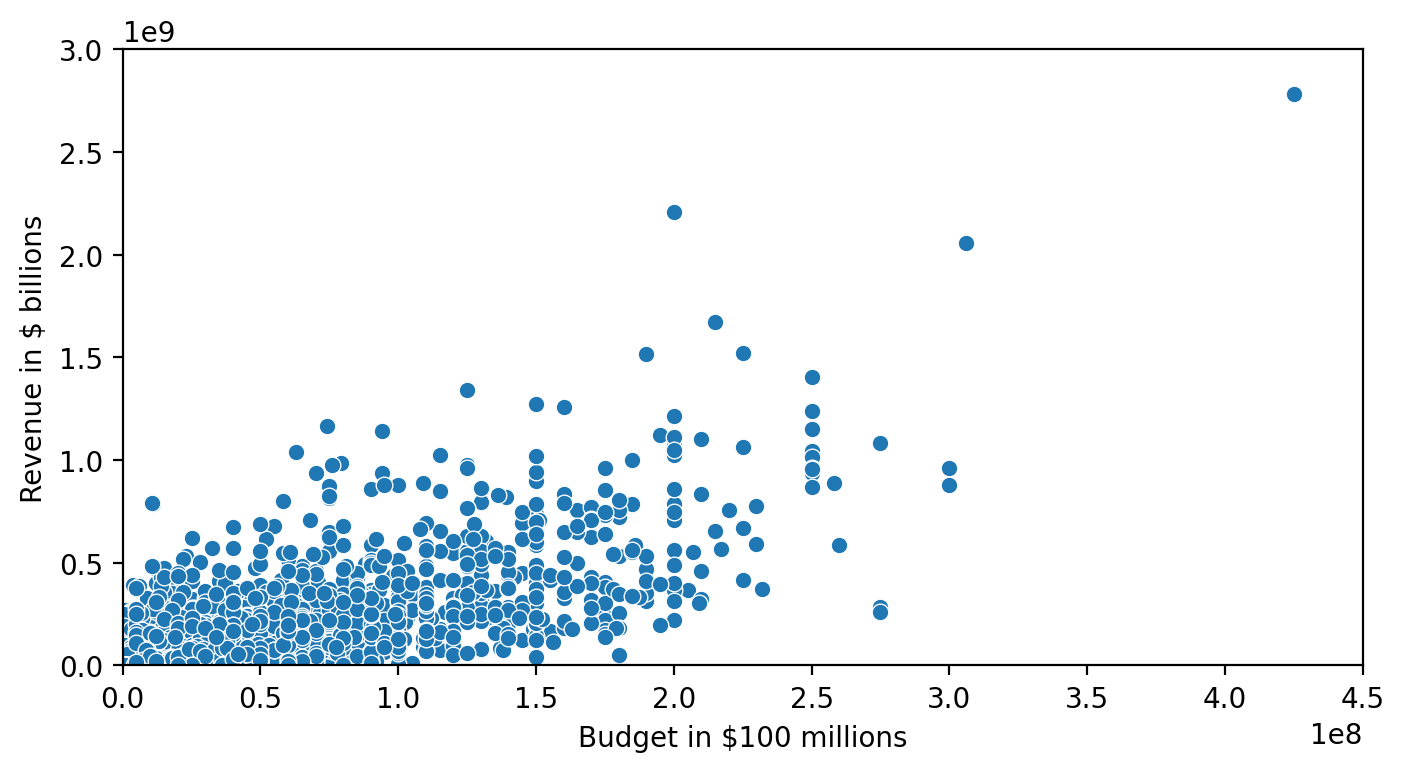

In [23]:
plt.figure(figsize=(8,4),dpi=200)
ax=sns.scatterplot(data=data_clean,x='USD_Production_Budget', y='USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

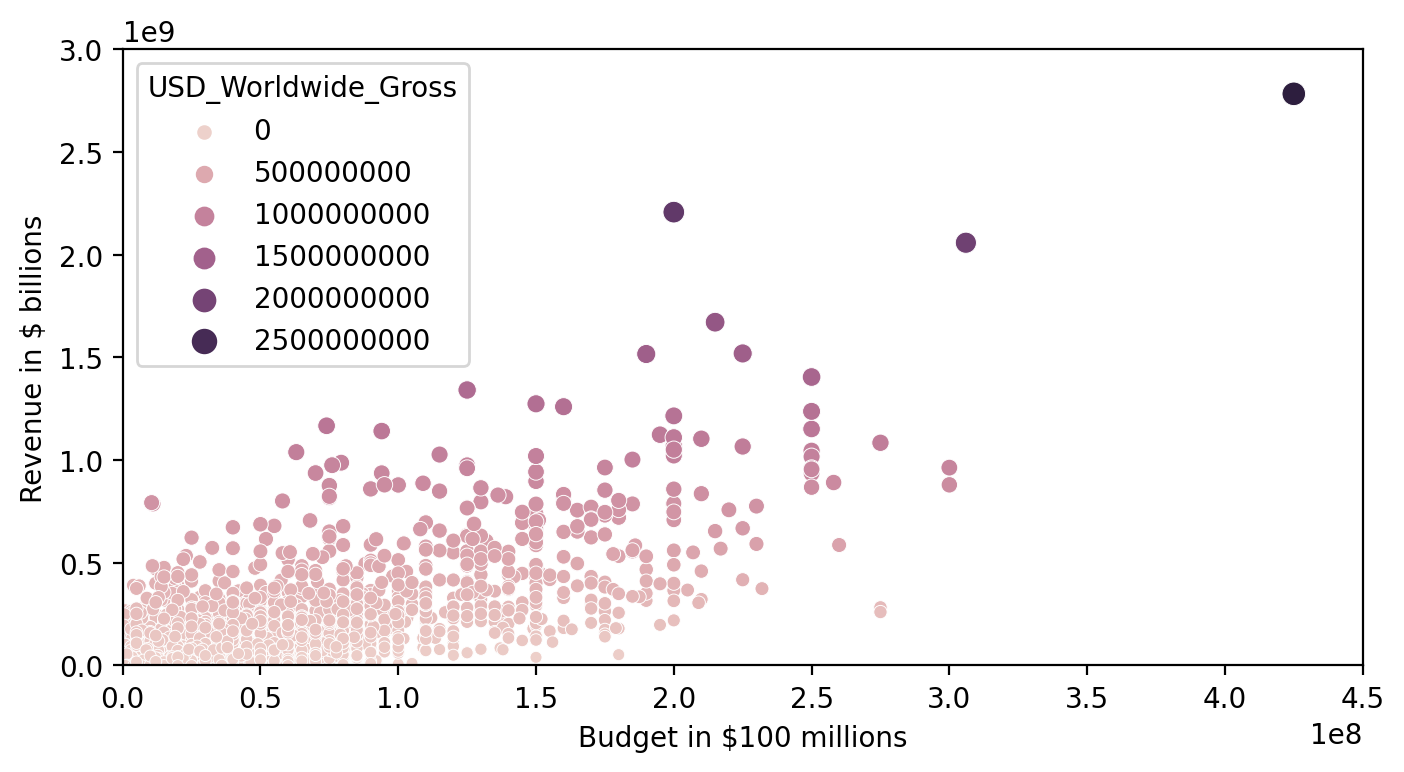

In [25]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', 
                     size='USD_Worldwide_Gross',)
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()


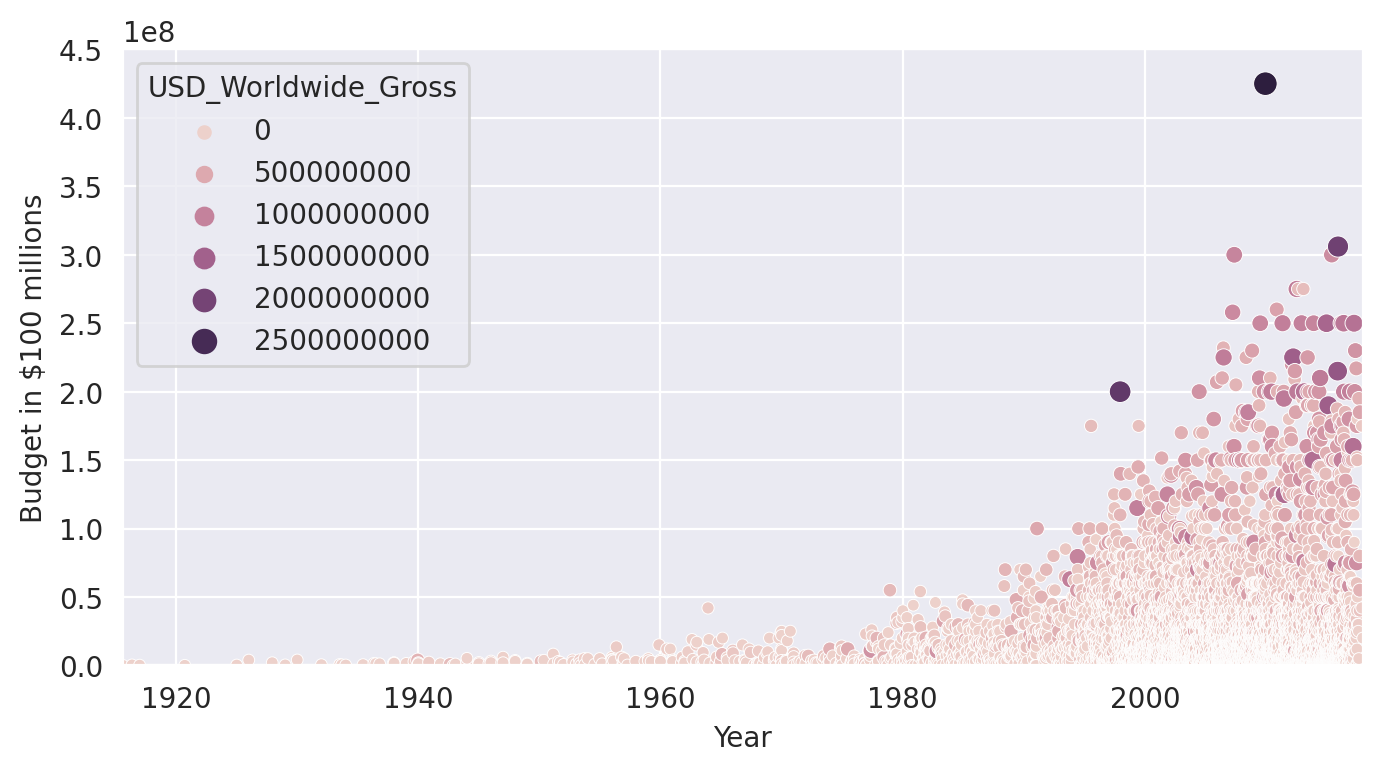

In [29]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
 

# Converting Years to Decades 


In [44]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
decades=years//10 *10
data_clean['Decade'] = decades


### Separate the "old" (before 1969) and "New" (1970s onwards) Films


In [49]:
old_films=data_clean[data_clean.Decade<1969]
new_films=data_clean[data_clean.Decade>1969]

In [50]:
print(len(old_films))

153


In [52]:
print(old_films.describe())

          Rank  USD_Production_Budget  USD_Worldwide_Gross  \
count   153.00                 153.00               153.00   
mean  4,274.77           4,611,297.65        30,419,634.38   
std     742.14           5,713,648.85        54,931,828.93   
min   1,253.00             100,000.00                 0.00   
25%   3,973.00           1,250,000.00         5,273,000.00   
50%   4,434.00           2,900,000.00        10,000,000.00   
75%   4,785.00           5,000,000.00        33,208,099.00   
max   5,299.00          42,000,000.00       390,525,192.00   

       USD_Domestic_Gross   Decade  
count              153.00   153.00  
mean        22,389,473.87 1,949.15  
std         32,641,752.41    12.72  
min                  0.00 1,910.00  
25%          5,000,000.00 1,940.00  
50%         10,000,000.00 1,950.00  
75%         28,350,000.00 1,960.00  
max        198,680,470.00 1,960.00  


# Seaborn Regression Plots

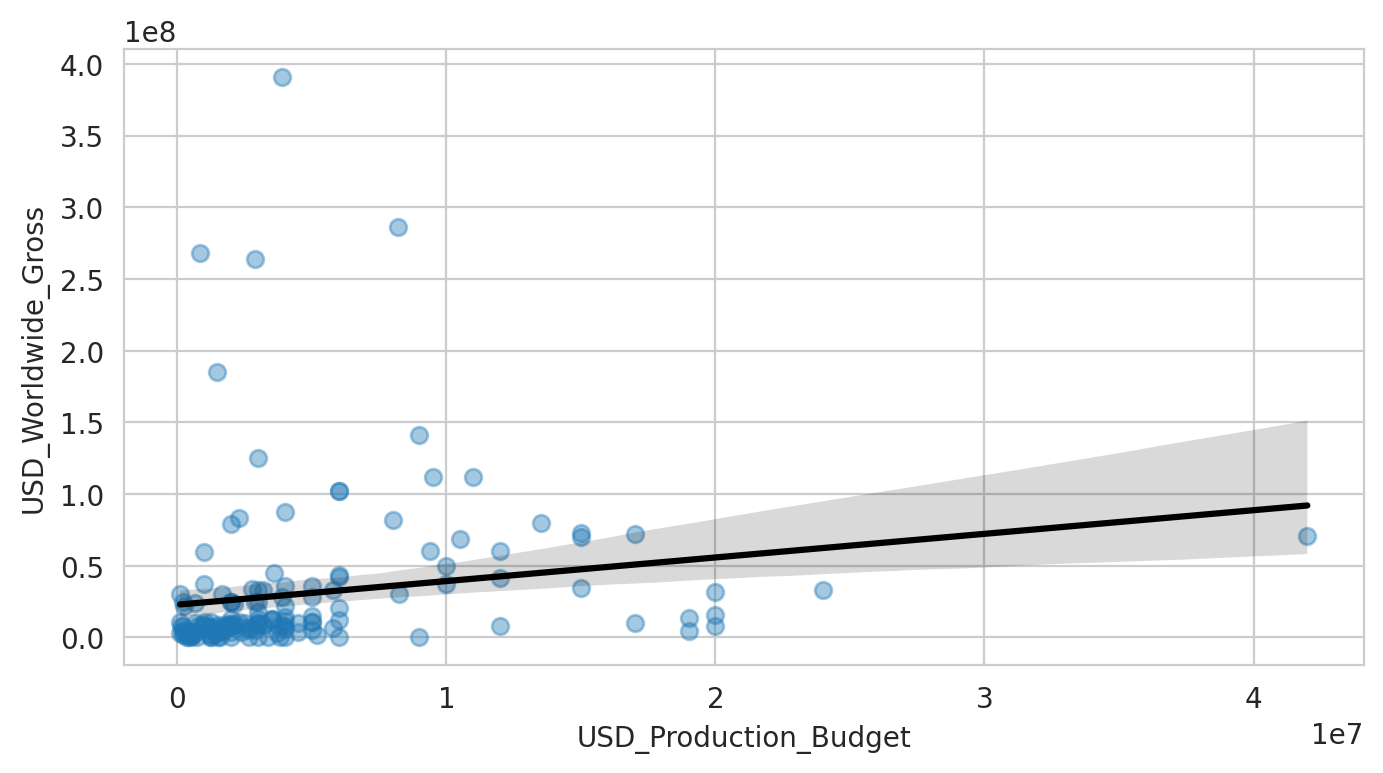

In [54]:
# sns.regplot(data=old_films, 
#             x='USD_Production_Budget',
#             y='USD_Worldwide_Gross')
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})



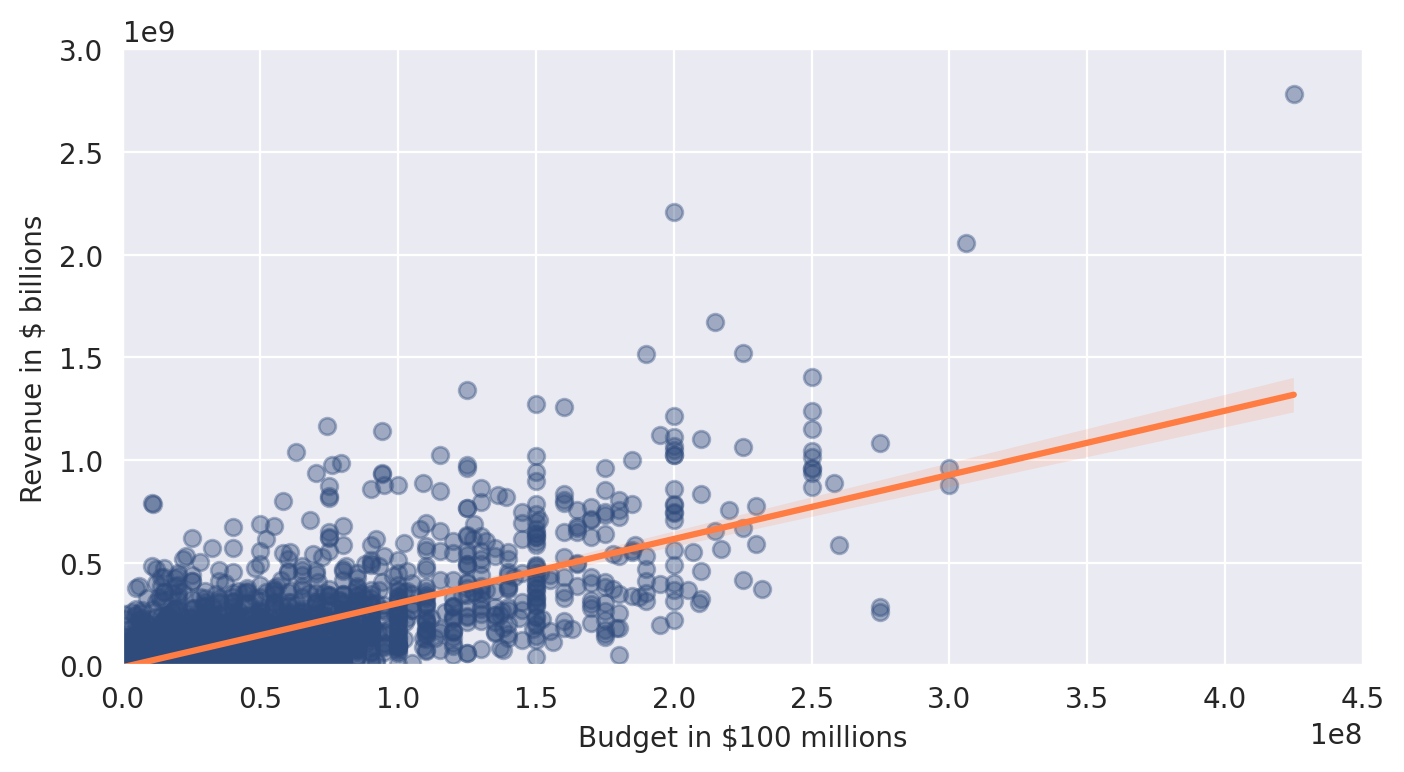

In [59]:
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style("darkgrid"):
    ax=sns.regplot(data=new_films,
               x='USD_Production_Budget', 
               y='USD_Worldwide_Gross',
               color='#2f4b7c',
               scatter_kws = {'alpha': 0.4},
               line_kws = {'color': '#ff7c43'}
               )
    ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 
plt.show()    

# Run  Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [65]:
regression=LinearRegression()
x = pd.DataFrame(new_films, columns=['USD_Production_Budget']) #features
 
#Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [70]:
regression.fit(x,y)
print(regression.intercept_)
print(regression.coef_)
#not possible

[-8650768.00661024]
[[3.12259592]]


In [72]:
regression.score(x, y)

0.5577032617720403

In [73]:
regression=LinearRegression()
X = pd.DataFrame(old_films, columns=['USD_Production_Budget']) #features
 
#Target
Y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

In [74]:
regression.fit(X,Y)
print(regression.intercept_)
print(regression.coef_)
#not possible

[22821538.63508038]
[[1.64771314]]


In [75]:
regression.score(X, Y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept!  our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$
 How much global revenue does our model estimate for a film with a budget of $350 million? 

In [77]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
